<a href="https://colab.research.google.com/github/Juleyaj/Cancer_Detection_2202037/blob/main/Cancer_2202037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv('/content/cancer_csv.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [7]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

In [9]:
# Convert all int64 columns to float64
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})

# Check the result
print(df.dtypes)


Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [11]:
x = df.drop(columns = ['Dx:Cancer'])
y = df['Dx:Cancer']

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x,y, random_state=42, test_size= 0.2
)


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8578207257298369

In [14]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)


0.050082295550597004


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(xtrain,ytrain)
    name = type(model).__name__
    score = model.score(xtest,ytest)*100
    errors[name] = score


In [16]:
errors

{'RandomForestRegressor': 91.54817073170732,
 'DecisionTreeRegressor': 66.0569105691057,
 'LinearRegression': 85.7820725729837}

<BarContainer object of 3 artists>

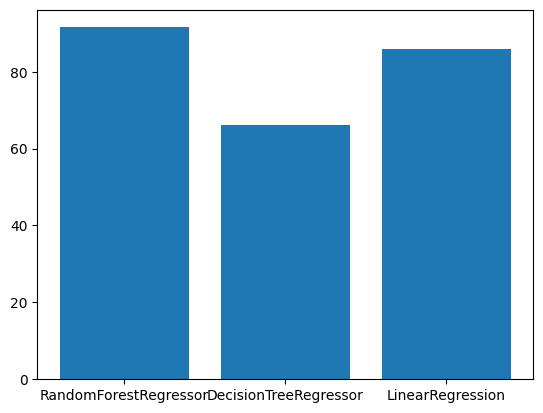

In [17]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())


/tmp/ipython-input-120495182.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


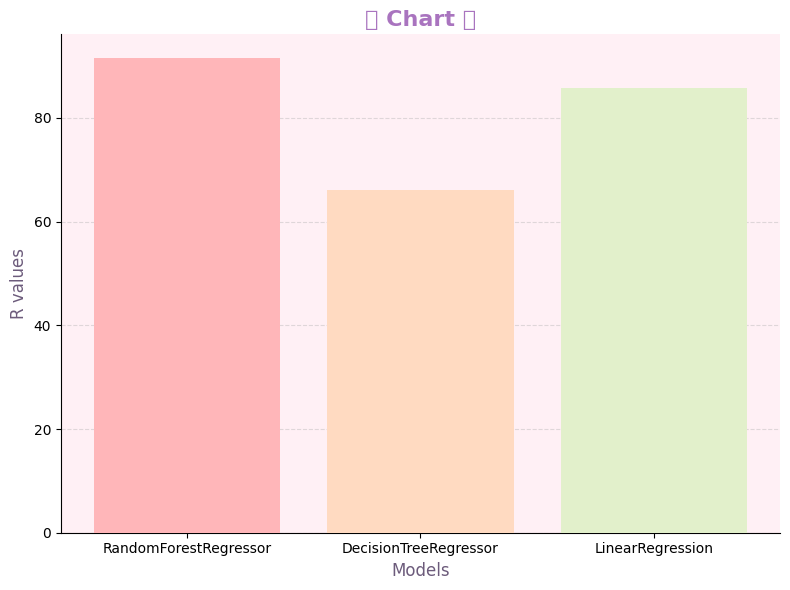

In [18]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
